# Graded Challenge 4 (K-Means Clustering)

---

## Introduction
Nama : Luthfi Fadhlillah

Batch : FTDS 009

---

Dataset Information

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

## Import Libraries

Melakukan import libraries yang akan digunakan

In [730]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px

## Data Loading

Melakukan data loading yang berasal dari https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?datasetId=14701&sortBy=voteCount

In [731]:
data_asli = pd.read_csv('CC GENERAL.csv')
data_asli

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [732]:
data = data_asli.copy()

In [733]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [734]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [735]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Dataset terdiri dari 8950 baris dan 18 kolom

## EDA

In [736]:
num_cols = list(data.select_dtypes("number").columns)
print("Num Features Length",len(num_cols), ":", num_cols)

Num Features Length 17 : ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


Kita memiliki 17 fitur numerical dalam datsets

In [737]:
num_cols_skewness = data[num_cols].skew()

Jika skeewness kurang dari -1 atau lebih besar dari 1, distribusinya highly skewed. Jika skewnessnya antara -1 dan -0,5 atau antara 0,5 dan 1, distribusinya moderately skewed. Jika skewness antara -0,5 dan 0,5, distribusinya simetris.

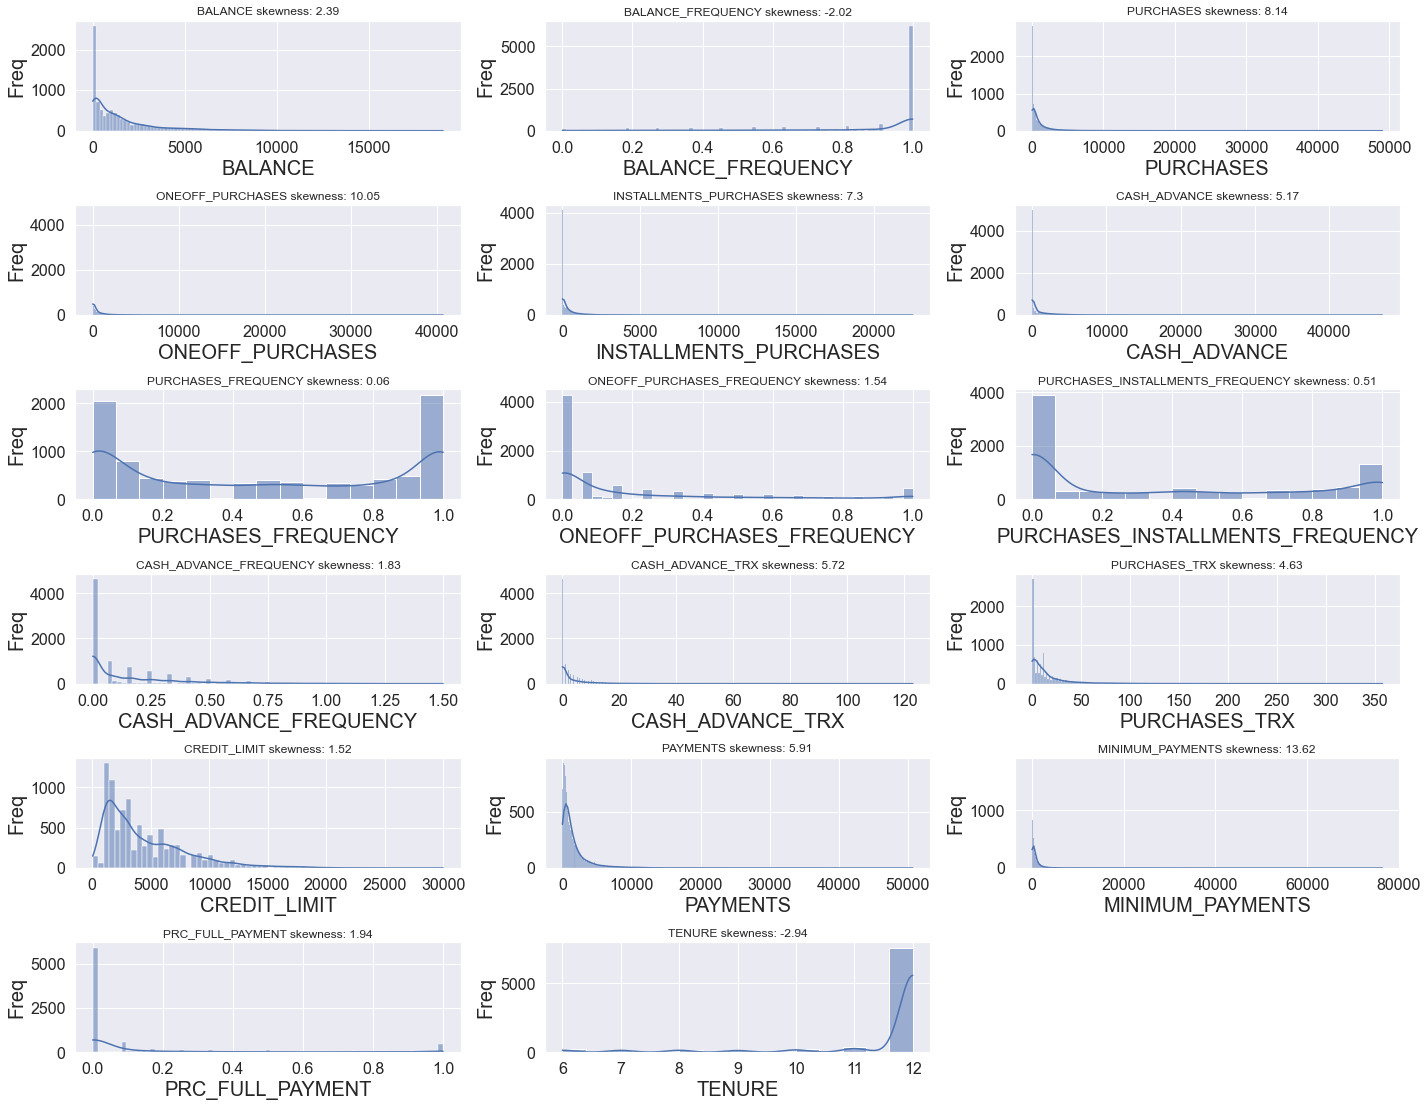

In [738]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.histplot(
        data[num_cols[i]],
        kde = True
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
    ax.set_title(str(num_cols[i]) + ' skewness: ' + str(round(num_cols_skewness[i], 2)))
plt.tight_layout()
plt.show()

Ada banyak skewness dan mereka bervariasi. Sekarang tergantung pada kita apakah kita ingin menangani skewness dalam dataset ini atau tidak untuk masalah clustering. Misalnya jika kita ingin melakukan pengelompokan untuk deteksi anomali dalam hal ini kita tidak ingin menangani outlier karena kita ingin model kita mendeteksi mereka dan mengelompokkannya dalam sebuah cluster. Untuk saat ini, saya mencari visualisasi yang baik jadi saya ingin menangani skewness sebanyak mungkin karena akan membantu model untuk membentuk cluster yang lebih baik.



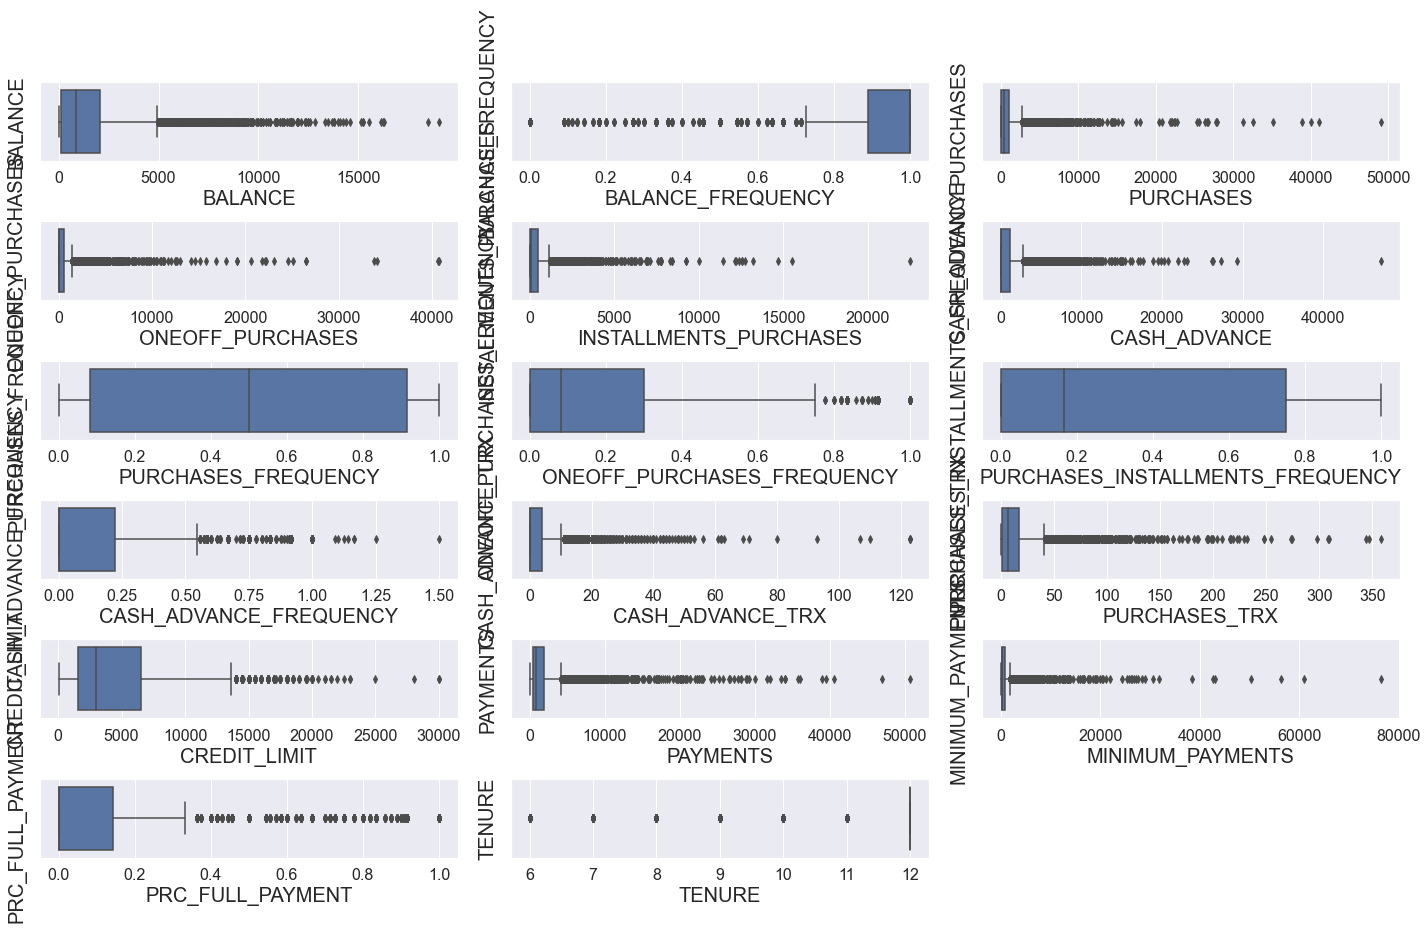

In [739]:
plt.figure(figsize=(20, 15))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.boxplot(
        x = data[num_cols[i]]
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 20)
    ax.set_ylabel(str(num_cols[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

In [740]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Fitur yang mengandung outlier:

Upper limits: 
BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, ONEOFF_PURCHASES_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX , PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT

Bottom limits:
BALANCE_FREQUENCY dan TENURE


In [741]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat missing values pada fitur MINIMUM_PAYMENTS dan CREDIT_LIMIT

### Correlation

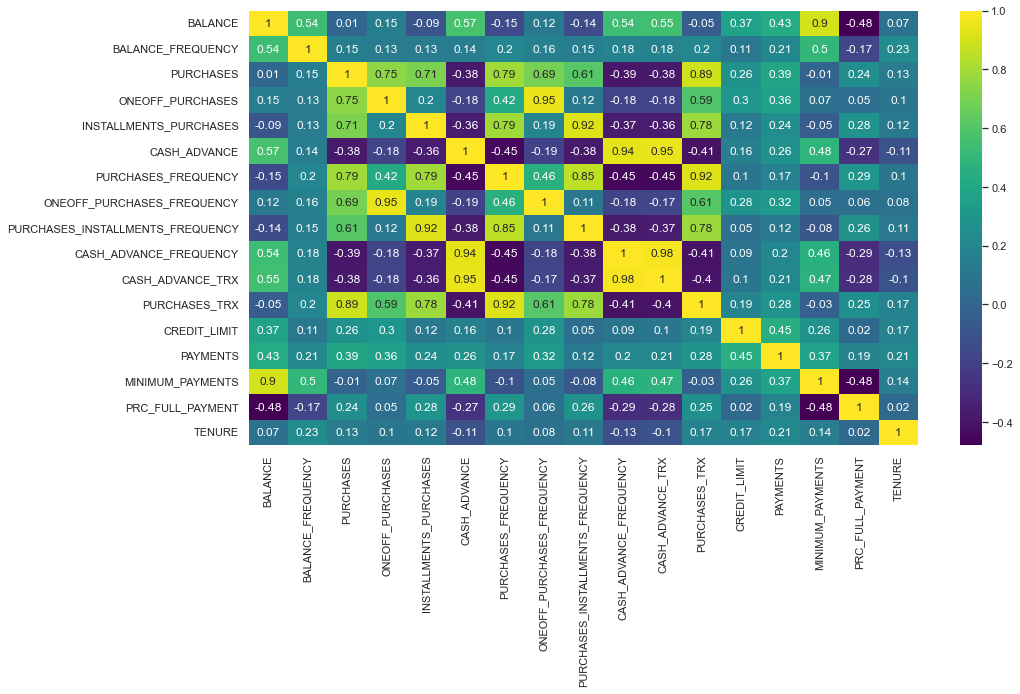

In [742]:
plt.figure(figsize=(15, 8))
sns.heatmap(round(data[num_cols].corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='viridis')
plt.show()

In [743]:
corr_mat = data[num_cols].corr()
corr_mat = corr_mat.unstack()
corr_mat = corr_mat.sort_values(kind="quicksort").drop_duplicates()
corr_mat[corr_mat>0.5]

PURCHASES_FREQUENCY               ONEOFF_PURCHASES_FREQUENCY    0.501343
PURCHASES_INSTALLMENTS_FREQUENCY  INSTALLMENTS_PURCHASES        0.511351
ONEOFF_PURCHASES_FREQUENCY        ONEOFF_PURCHASES              0.524891
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX                 0.529975
CREDIT_LIMIT                      BALANCE                       0.531283
PURCHASES_TRX                     ONEOFF_PURCHASES_FREQUENCY    0.544869
                                  ONEOFF_PURCHASES              0.545523
PAYMENTS                          ONEOFF_PURCHASES              0.567292
PURCHASES_FREQUENCY               PURCHASES_TRX                 0.568430
PAYMENTS                          PURCHASES                     0.603264
PURCHASES_TRX                     INSTALLMENTS_PURCHASES        0.628108
CASH_ADVANCE                      CASH_ADVANCE_FREQUENCY        0.628522
                                  CASH_ADVANCE_TRX              0.656498
INSTALLMENTS_PURCHASES            PURCHASES        

### EDA ANalysis

Terlihat dalam dataset memiliki banyak sekali outlier pada masing-masing fitur. Namun pada data preprocessing saya akan menghapus outlier yang persentasenya lebih dari 10%.

## Data Preprocessing

**Handling Missing Value**

In [744]:
missingValueFeatures = pd.DataFrame({'missing %': data.isnull().sum()*100/len(data)})
missingValueFeatures[missingValueFeatures['missing %']>0]

,missing %
CREDIT_LIMIT,0.011173
MINIMUM_PAYMENTS,3.497207


Terdapat missing values dalam fitur `MINIMUM_PAYMENTS` dan `CREDIT_LIMIT`. Kemudian saya lebih memilih untuk mengisi missing values tersebut dengan nilai Mean daripada harus menghilangkan data yang mengandung missing values

In [745]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].mean()

In [746]:
data.isnull().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

Missing values sudah tidak terdapat dalam dataset.

**Cek Duplicate Rows**

In [747]:
data.duplicated().sum()

0

Tidak ada duplicate rows dalam dataset

In [748]:
# drop kolom yang tidak digunakan
data.drop(columns=["CUST_ID"],axis=1,inplace=True)

**Handling Outlier**

In [749]:
# Mencari outliers disemua kolom yang ada
for i in data.select_dtypes(include=['float64','int64']).columns:
  max_thresold=data[i].quantile(0.95)
  min_thresold=data[i].quantile(0.05)
  creditcard_df_no_outlier=data[(data[i] < max_thresold) & (data[i] > min_thresold)].shape
  print(" outlier in ",i,"is" ,int(((data.shape[0]-creditcard_df_no_outlier[0])/data.shape[0])*100),"%")

 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %


In [750]:
# remove outliers dari kolom yang memiliki nilai 10% atau lebih
max_thresold_BALANCE=data["BALANCE"].quantile(0.95)
min_thresold_BALANCE=data["BALANCE"].quantile(0.05)
max_thresold_CREDIT_LIMIT=data["CREDIT_LIMIT"].quantile(0.95)
min_thresold_CREDIT_LIMIT=data["CREDIT_LIMIT"].quantile(0.05)
max_thresold_PAYMENTS=data["PAYMENTS"].quantile(0.95)
min_thresold_PAYMENTS=data["PAYMENTS"].quantile(0.05)
creditcard_df_no_outlier=data[(data["CREDIT_LIMIT"] < max_thresold_CREDIT_LIMIT) & (data["CREDIT_LIMIT"] > min_thresold_CREDIT_LIMIT) & (data["BALANCE"] < max_thresold_BALANCE) & (data["BALANCE"] > min_thresold_BALANCE) &  (data["PAYMENTS"] < max_thresold_PAYMENTS) & (data["PAYMENTS"] > min_thresold_PAYMENTS)]


In [751]:
creditcard_df_no_outlier.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12


**Scalling**

In [752]:
# scale the DataFrame
scalar=StandardScaler()
creditcard_scaled_df=scalar.fit_transform(creditcard_df_no_outlier)

**Analisis nilai VIF**

In [753]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [754]:
vif = pd.DataFrame()
df = data.dropna()
vif["variables"] = [feature for feature in num_cols if feature not in ['MINIMUM_PAYMENTS', 'CREDIT_LIMIT', 'PURCHASES_TRX',
                                                                                'BALANCE', 'PURCHASES_FREQUENCY', 'PAYMENTS',
                                                                                'PURCHASES', 'CASH_ADVANCE_TRX', 'BALANCE_FREQUENCY',
                                                                                'INSTALLMENTS_PURCHASES']]
vif["VIF"] = [variance_inflation_factor(data[vif['variables']].values, i) for i in range(len(vif["variables"]))]
print(vif)

                          variables       VIF
0                  ONEOFF_PURCHASES  1.568326
1                      CASH_ADVANCE  2.019377
2        ONEOFF_PURCHASES_FREQUENCY  2.059984
3  PURCHASES_INSTALLMENTS_FREQUENCY  2.077065
4            CASH_ADVANCE_FREQUENCY  2.508062
5                  PRC_FULL_PAYMENT  1.425380
6                            TENURE  3.216631


## PCA

In [755]:
pca= PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_scaled_df)
pca_df=pd.DataFrame(data=principal_comp,columns=["pca1","pca2"])
pca_df.head()

,pca1,pca2
0,-2.286551,3.003845
1,1.134747,0.431870
2,-1.458102,-1.493204
3,0.740708,-0.539469
4,0.648376,-1.077155


In [756]:
pca.components_

array([[-0.08878791,  0.06067448,  0.38518782,  0.29137668,  0.31649967,
        -0.19669136,  0.37061879,  0.28071162,  0.31445793, -0.2292699 ,
        -0.18840472,  0.36180977,  0.12128815,  0.16807737, -0.01552103,
         0.17437555,  0.09321362],
       [ 0.42059882,  0.2026281 ,  0.18165755,  0.19569178,  0.06600316,
         0.39321799, -0.01685666,  0.14932876, -0.0485696 ,  0.38946372,
         0.38517022,  0.13811032,  0.24739197,  0.30625564,  0.14394694,
        -0.17706107, -0.0254071 ]])

In [757]:
pca.explained_variance_ratio_

array([0.29221879, 0.1763714 ])

Text(0.5, 1.0, 'Variance Ratio setiap PCA component')

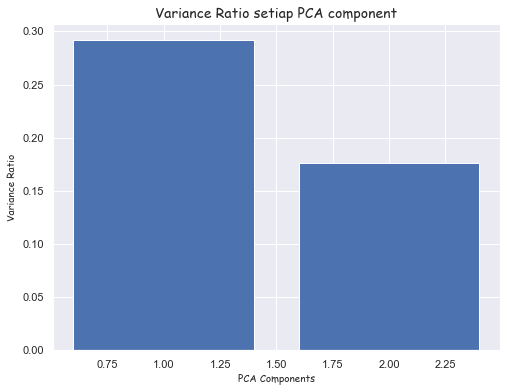

In [758]:
# Bar Plot untuk setiap component
fig = plt.figure(figsize = (8,6))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontsize=10,family = "Comic Sans MS")
plt.ylabel("Variance Ratio",fontsize=10,family = "Comic Sans MS")
plt.title("Variance Ratio setiap PCA component",fontsize=14,family = "Comic Sans MS")

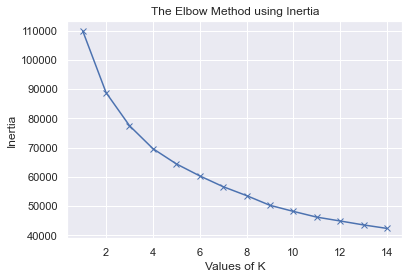

In [759]:
# find 'k' value by Elbow Method
inertia=[]
range_val=range(1,15)
for i in range_val:
  kmean=KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(creditcard_scaled_df))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [760]:
# Spectral clustering
def train_spectral(k,X):
  spectral_model = SpectralClustering(n_clusters=k)
  y_pred = spectral_model.fit_predict(X)
  print("Spectral Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )

# Agglomerative clustering
def train_Agglomerative(linkage,k,X):
  agglo_model = AgglomerativeClustering(linkage=linkage,n_clusters=k)
  y_pred = agglo_model.fit_predict(X)
  print("Agglomerative Clustering : clusters : ",k," linkage : ",linkage," silhouette_score : ",silhouette_score(X,y_pred) )

# GaussianMixture Model based clustering
def train_GaussianMixture(k,X):
  GaussianMixture_model = GaussianMixture(n_components=k)
  y_pred = GaussianMixture_model.fit_predict(X)
  print("GaussianMixture Model based Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )


In [761]:
# Spectral clustering
clusters=[3,4,5,6]
for i in clusters:
  train_spectral(i,creditcard_scaled_df)

Spectral Clustering : clusters :  3  silhouette_score :  0.7435601679338187
Spectral Clustering : clusters :  4  silhouette_score :  0.6201069070408155
Spectral Clustering : clusters :  5  silhouette_score :  0.6184496768758896
Spectral Clustering : clusters :  6  silhouette_score :  0.5902864476900191


In [762]:
# Agglomerative clustering
clusters=[3,4,5,6]
linkage=['ward', 'complete', 'average', 'single']
for lin in linkage:
  for i in clusters:
    train_Agglomerative(lin,i,creditcard_scaled_df)

Agglomerative Clustering : clusters :  3  linkage :  ward  silhouette_score :  0.17431376108556423
Agglomerative Clustering : clusters :  4  linkage :  ward  silhouette_score :  0.1489272830908925
Agglomerative Clustering : clusters :  5  linkage :  ward  silhouette_score :  0.14815566752346945
Agglomerative Clustering : clusters :  6  linkage :  ward  silhouette_score :  0.15430339363639792
Agglomerative Clustering : clusters :  3  linkage :  complete  silhouette_score :  0.6980529937164554
Agglomerative Clustering : clusters :  4  linkage :  complete  silhouette_score :  0.31370289803604545
Agglomerative Clustering : clusters :  5  linkage :  complete  silhouette_score :  0.3056035595515703
Agglomerative Clustering : clusters :  6  linkage :  complete  silhouette_score :  0.2791675976061798
Agglomerative Clustering : clusters :  3  linkage :  average  silhouette_score :  0.6980529937164554
Agglomerative Clustering : clusters :  4  linkage :  average  silhouette_score :  0.65731138017

In [763]:
# GaussianMixture Model based clustering
clusters=[3,4,5,6]
for i in clusters:
  train_GaussianMixture(i,creditcard_scaled_df)

GaussianMixture Model based Clustering : clusters :  3  silhouette_score :  0.11605827583746624
GaussianMixture Model based Clustering : clusters :  4  silhouette_score :  0.1010354734206661
GaussianMixture Model based Clustering : clusters :  5  silhouette_score :  0.0814817804540757
GaussianMixture Model based Clustering : clusters :  6  silhouette_score :  0.018860544934542065


## K-Means

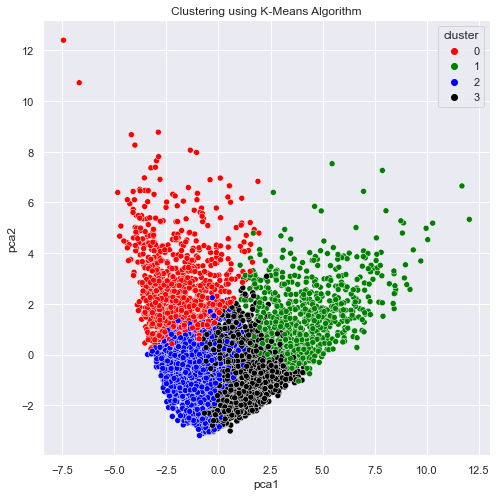

In [764]:
# kmeans algorithm
kmeans_model=KMeans(4)
kmeans_model.fit_predict(creditcard_scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
# visualisasi
plt.figure(figsize=(8,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

## Agglomerative Clustering

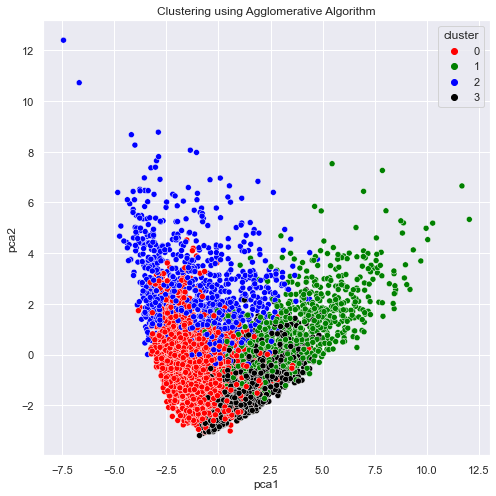

In [765]:
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=4)
y_pred = agglo_model.fit_predict(creditcard_scaled_df)
pca_df_aglo= pd.concat([pca_df,pd.DataFrame({'cluster':agglo_model.labels_})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_aglo,palette=['red','green','blue','black'])
plt.title("Clustering using Agglomerative Algorithm")
plt.show()

## Spectral Clustering

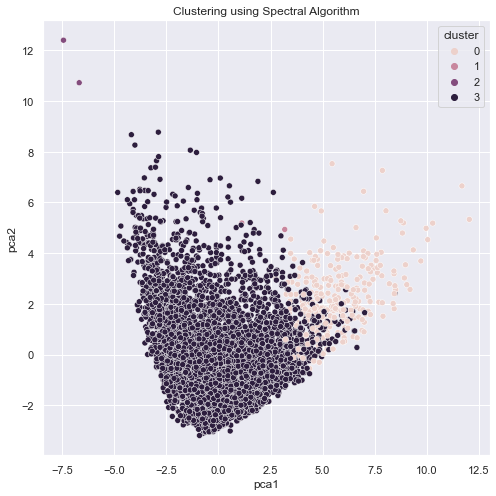

In [766]:
spectral_model = SpectralClustering(n_clusters=4)
y_pred = spectral_model.fit_predict(creditcard_scaled_df)
pca_df_spl= pd.concat([pca_df,pd.DataFrame({'cluster':spectral_model.labels_})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_spl)
plt.title("Clustering using Spectral Algorithm")
plt.show()

## GaussianMixture Model based clustering

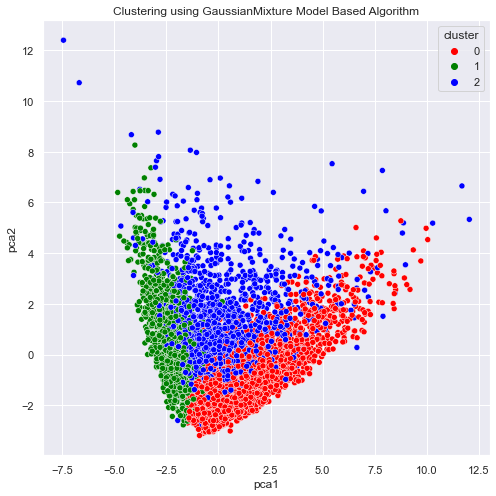

In [767]:
GaussianMixture_model = GaussianMixture(n_components=3)
y_pred = GaussianMixture_model.fit_predict(creditcard_scaled_df)
pca_df_gmm= pd.concat([pca_df,pd.DataFrame({'cluster':y_pred})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_gmm,palette=['red','green','blue'])
plt.title("Clustering using GaussianMixture Model Based Algorithm")
plt.show()

## DBSCAN

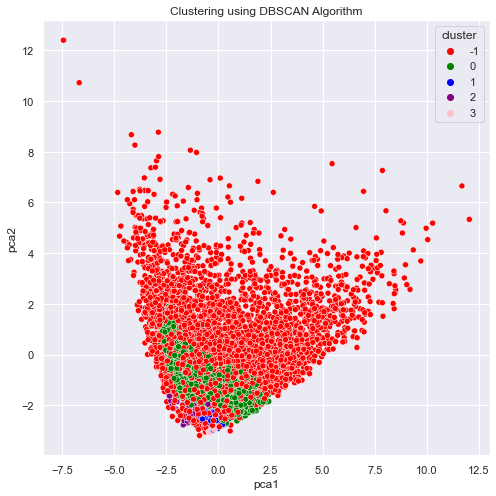

In [768]:
model_dbscan = DBSCAN(eps=1, min_samples=18)
y_pred = model_dbscan.fit_predict(creditcard_scaled_df)
pca_df_dbscan= pd.concat([pca_df,pd.DataFrame({'cluster':model_dbscan.labels_})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_dbscan,palette=['red','green','blue','purple','pink'])
plt.title("Clustering using DBSCAN Algorithm")
plt.show()

## Model Inference

In [769]:
data_asli

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [770]:
kmeans_model.labels_

array([0, 3, 2, ..., 3, 3, 2])

In [771]:
data_asli['Labels'] = kmeans.labels_

In [772]:
data_asli

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,2
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


In [773]:
data_asli.Labels.unique()

array([2, 1, 0])

In [774]:
data_lab_0 = data_asli[data_asli['Labels'] == 0]
data_lab_0

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
12,C10013,1516.928620,1.000000,3217.99,2500.23,717.76,0.000000,1.000000,0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.250000,12,0
21,C10022,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,0
34,C10035,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.000000,12,0
37,C10038,4047.480828,1.000000,2380.55,1642.17,738.38,1697.660901,0.750000,0.500000,0.750000,0.333333,7,41,5000.0,1617.894416,1541.141605,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,C18926,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12,0
8698,C18935,873.680279,1.000000,2397.05,1072.46,1324.59,1657.160669,1.000000,0.500000,0.916667,0.583333,12,23,2500.0,2028.986135,297.682079,0.083333,12,0
8707,C18944,78.448912,1.000000,1875.18,977.85,897.33,0.000000,1.000000,0.833333,0.916667,0.000000,0,78,1200.0,1656.503571,172.161277,1.000000,12,0
8737,C18975,2533.618119,0.909091,5633.83,2985.92,2647.91,2451.807788,0.916667,0.500000,0.750000,0.333333,16,82,9000.0,8176.953944,602.963244,0.000000,12,0


In [775]:
data_lab_1 = data_asli[data_asli['Labels'] == 1]
data_lab_1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
15,C10016,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,1
23,C10024,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,1
24,C10025,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,1
28,C10029,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,C19099,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,3000.0,726.683966,127.843735,0.000000,7,1
8869,C19110,2171.222526,1.000000,791.18,791.18,0.00,2056.602480,0.428571,0.428571,0.000000,0.571429,6,8,3000.0,300.088696,453.100425,0.000000,7,1
8915,C19156,381.341657,1.000000,78.00,0.00,78.00,934.808869,1.000000,0.000000,0.833333,0.666667,16,6,1000.0,143.118373,85.152441,0.000000,6,1
8917,C19158,1880.817982,1.000000,0.00,0.00,0.00,2335.949930,0.000000,0.000000,0.000000,0.333333,5,0,2500.0,221.568190,374.197621,0.000000,6,1


In [776]:
data_lab_2 = data_asli[data_asli['Labels'] == 2]
data_lab_2

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.00,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,2
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,2
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6,2
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,2
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,2


## Conclusion

**EDA Insight**

Saat melakukan EDA pada dataset ditemukan beberapa kolom yang memiliki karakteristik yang berbeda dengan data yang lainnya. Kolom tersebut yaitu CUST_ID dan TENURE karena pada kolom tersebut terlihat bahwa value data nya tidak memiliki hubungan dengan kolom-kolom lain dengan kata lain value yang terdapat pada kolom tersebut bersifat categorical dimana persebaran data nya tidak memiliki karakteristik dari suatu cluster yang dimiliki pada kolom-kolom lain sehingga CUST_ID dilakukan drop kolom

**Model Analysis**

Cluster yang dibentuk menggunakan K-Means kurang lebih berbentuk bola atau cembung dan harus memiliki ukuran fitur yang sama. Tetapi menggunakan DBSCAN, cluster berbentuk arbitrer dapat dibentuk.

Pengelompokan K-means lebih efisien untuk kumpulan data yang besar dan pengelompokan K-means juga sensitif terhadap jumlah cluster yang ditentukan. Sedangkan dalam kasus DBSCAN, tidak perlu menentukan jumlah cluster secara manual.

K-means Clustering tidak bekerja dengan baik dengan outlier dan dataset yang noisy sedangkan DBSCAN bekerja dengan baik dengan outlier.

Setelah dilakukan klasterisasi pada model K-means, DBSCAN, Agglomerative, dan Spectral dihasilkan bahwa:

- Model K-means menghasilkan 4 klaster  yaitu 0, 1, 2 dan 3
- Model Agglomerative menghasilkan 4 klaster  yaitu 0, 1, 2 dan 3
- Model Spectral menghasilkan 4 klaster  yaitu 0, 1, 2 dan 3
- Sedangkan model DBSCAN dan Gaussian Mixture menghasilkan klaster secara berurutan yaitu -1, 0, 1, 2, 3 untuk DBSCAN dan 0, 1 dam 2 untuk Gaussian Mixture.